# Regression Practice Problem (15 points)

In this notebook, we are going to work on a regression problem.

We will use a diabete dataset for practice. Each data sample in the dataset contains 10 features. The goal is to predict the target that measures the desease progression. We are going to implement a linear regression model to predict the target.

First run the following cell to download the training and test data. We will train our model on the training data and make predictions on the test set. The prediction results will be used for grading.

In [4]:
!wget https://drive.google.com/uc\?export\=download\&id\=1IQPZ2qKWCMJ8SF0mRHnbLUFm7mTrdIyP -O reg_test.csv
!wget https://drive.google.com/uc\?export\=download\&id\=1E5SOWL76HRHchZPf2j-H0KgQkW7sYQfy -O reg_train.csv

--2025-02-08 18:11:42--  https://drive.google.com/uc?export=download&id=1IQPZ2qKWCMJ8SF0mRHnbLUFm7mTrdIyP
Resolving drive.google.com (drive.google.com)... 142.250.4.139, 142.250.4.101, 142.250.4.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.4.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IQPZ2qKWCMJ8SF0mRHnbLUFm7mTrdIyP&export=download [following]
--2025-02-08 18:11:43--  https://drive.usercontent.google.com/download?id=1IQPZ2qKWCMJ8SF0mRHnbLUFm7mTrdIyP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.24.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15996 (16K) [application/octet-stream]
Saving to: ‘reg_test.csv’

reg_test.csv        100%[===================>]  15.62K  --.-KB/s    in 0s  

In [5]:
# export
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import feature_selection
import random

Load the training data and take a look at the features and targets.

In [6]:
df = pd.read_csv('reg_train.csv')
X = df.iloc[:,0:10]
y = df.iloc[:,10]

print(X)
print(y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
..        ...       ...       ...       ...       ...       ...       ...   
357  0.009016 -0.044642  0.055229 -0.005670  0.057597  0.044719 -0.002903   
358 -0.056370 -0.044642 -0.074108 -0.050427 -0.024960 -0.047034  0.092820   
359 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
360  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
361 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

## Task 1: Exploring the features (1 point)

Check the correlations between each feature and the target

In [7]:
correlation = X.corrwith(y)
print(correlation)

age    0.151423
sex    0.040111
bmi    0.570065
bp     0.436597
s1     0.248854
s2     0.196076
s3    -0.378994
s4     0.438475
s5     0.555471
s6     0.385137
dtype: float64


In [8]:
def PlotDataset(x, y, feature):
    '''
    x: the dataset feature matrix. (pd dataframe)
    y: the target vector (pd series)
    feature: the feature to visualize (type: str)

    '''
    plt.scatter(x.loc[:,[feature]], y,  color='blue', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')

Visualize the three features with highest correlation to the target in the following cells. Replace `feature_*` with your selection.

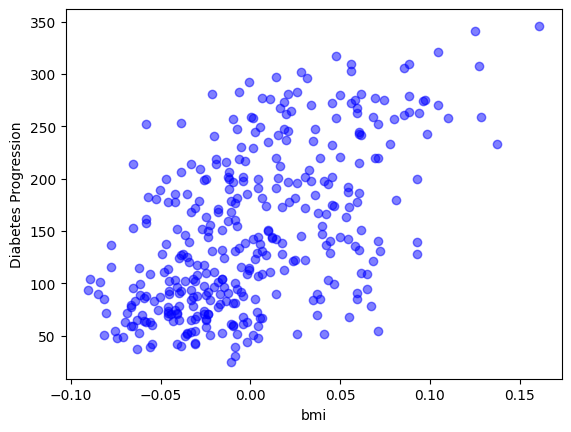

In [9]:
PlotDataset(X, y, 'bmi')

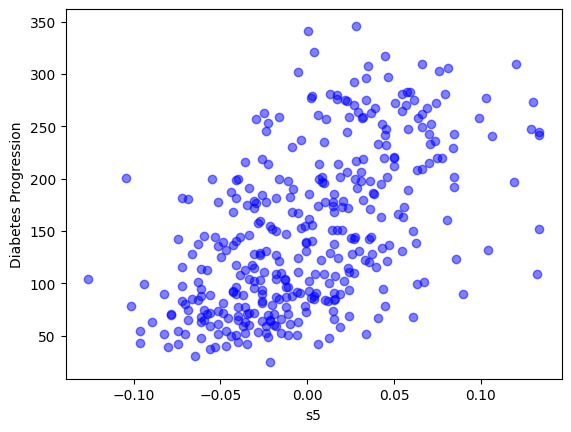

In [10]:
PlotDataset(X, y, 's5')

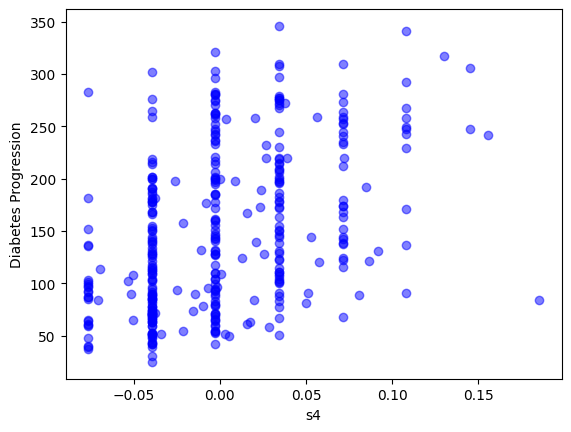

In [11]:
PlotDataset(X, y, 's4')

Put your selected feature names in the following function as the answer for task 1.

In [12]:
# export
def answer_task1():
    feature_1 = 'bmi'
    feature_2 = 's5'
    feature_3 = 's4'

    return [feature_1, feature_2, feature_3]
answer_task1()

['bmi', 's5', 's4']

## Task 2: Split the data for training and validation (2 points)

Before start building and training our model, we need to split a small fraction of our available data as the validation set, which will be used to evaluate the performance of our model and tune the hyperparameters.

In the next cell, you will complete a function that randomly split the dataset to training and validation sets.

In [ ]:
# export

seed = 0
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

# train test split
def random_split(X, y, seed=0, train_ratio=0.8):
    '''
    X: the dataset feature matrix. (pd dataframe)
    y: the target vector (pd series)
    seed: random seed
    train_ratio: the ratio of the training set, default is 0.8
    '''
    set_seed(seed)
    ##########################################################
    # generate a random permutation of the indices from 0 to len(X)
    indices = np.random.permutation(len(X))
    # Hint: check the documentation related to numpy.random
    ##########################################################
    train_indices = indices[:int(len(X) * train_ratio)]
    test_indices = indices[int(len(X) * train_ratio):]
    X_train = X.loc[train_indices].to_numpy()
    y_train = y.loc[train_indices].to_numpy()
    X_test = X.loc[test_indices].to_numpy()
    y_test = y.loc[test_indices].to_numpy()
    print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')
    return X_train, y_train, X_test, y_test

X_train: (289, 10), y_train: (289,), X_test: (73, 10), y_test: (73,)


(array([[-0.0382074 ,  0.05068012,  0.07139652, ...,  0.071948  ,
          0.05028067,  0.06933812],
        [-0.06363517, -0.04464164, -0.03315126, ..., -0.00259226,
         -0.02251653, -0.05906719],
        [-0.04910502, -0.04464164,  0.0250506 , ..., -0.03949338,
         -0.04117617,  0.00720652],
        ...,
        [-0.02367725, -0.04464164, -0.01590626, ...,  0.03430886,
          0.0140735 , -0.00936191],
        [-0.02730979, -0.04464164, -0.06656343, ..., -0.03949338,
         -0.03581619, -0.00936191],
        [ 0.01628068,  0.05068012,  0.07247433, ..., -0.00259226,
         -0.02364686,  0.06105391]]),
 array([220., 214., 182., 341.,  74., 310., 273.,  90., 280.,  63.,  49.,
        158.,  72.,  85.,  59., 268., 217.,  58.,  67.,  64., 139.,  66.,
        197., 132.,  89., 253.,  55., 248., 125., 109., 150., 220., 168.,
        259., 163., 138., 111., 173., 167., 242., 241.,  71.,  71., 180.,
        137.,  97.,  59., 310., 219.,  51.,  71.,  84., 150., 116.,  90.,
   

## Task 3: Linear regression and gradient descent (8 points)

Next we will implement the linear regression model. A linear regression model is defined as $Y=X\theta$. Complete the function `linear_model` that computes $Y$ using $X$ and $\theta$.

To train a linear regression model, we adopt the mean squared error (MSE) as the loss function and aim to minimize it. Complete the function `mse` that computes the mean squared error between the predictions and ground truths. Note that $L_{MSE}=\frac{1}{2n}\Vert X\theta - Y\Vert_2^2$.

Then, to use gradient descent algorithm for training, we need to compute the gradient of the MSE loss with respect to parameter $\theta$. Differentiating $L_{MSE}$ with respect to $\theta$, we can have $\frac{\partial L_{MSE}}{\partial \theta} = \frac{1}{n} X^\top (X\theta - Y)$.

In [ ]:
# export

def linear_model(X, theta):
    '''
    X: nxd feature matrix (np.array)
    theta: weight vector of length d (np.array)
    '''
    ##########################################################
    # implement the linear model
    output = np.dot(X,theta)
    ##########################################################
    return output
print(linear_model(X=np.array([[1,2],[3,4]]),theta=np.array([1,2])))

def mse(y_true, y_pred):
    '''
    y_true: ground truth target vector (np.array)
    y_pred: predicted target vector (np.array)
    '''
    ##########################################################
    # implement the mean squared error
    output = np.mean(np.square(y_true - y_pred))
    ##########################################################

    return output
print(mse(np.array([1,2,3]),np.array([2,3,4])))

def mse_grad(theta, X, y_true):
    '''
    theta: weight vector of length d (np.array)
    X: nxd feature matrix (np.array)
    y_true: ground truth target vector (np.array)
    '''
    ##########################################################
    # implement the gradient of the mean squared error
    grad = -2 * np.dot(X.T, (y_true - np.dot(X, theta))) / len(y_true)
    ##########################################################

    return grad
print(mse_grad(np.array([1,2,3]),np.array([[1,2,3],[4,5,6]]),np.array([2,3])))

[ 5 11]
1.0
[128. 169. 210.]


Next implement the gradient descent algorithm in the following.

In [ ]:
# export

learning_rate = 4e-1
num_epochs = 8000
log_interval = 500
epsilon = 1e-3

def gradient_descent(X_train, y_train):
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    theta = np.random.rand(X_train.shape[1])

    for epoch in range(num_epochs):
        theta_prev = theta.copy()
        ##########################################################
        # update theta using a gradient descent step
        grad = mse_grad(theta, X_train, y_train)
        theta = theta - (learning_rate * grad)
        ##########################################################
        if epoch % log_interval == 0:
            train_loss = mse(y_train, linear_model(X_train, theta))
            print(f'Epoch {epoch} / {num_epochs}, training loss: {train_loss}')
        if np.linalg.norm(theta - theta_prev) < epsilon:
            print(f'Training converged at epoch {epoch}')
            break
    return theta

In [21]:
def evaluate(X_test, y_test, theta, plot=False):
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    y_pred = linear_model(X_test, theta)
    test_loss = mse(y_test, y_pred)
    print(f'Test MSE loss: {test_loss}')
    test_pearsonr = np.corrcoef(y_test, y_pred)[0, 1]
    print(f'Test Pearson correlation: {test_pearsonr}')
    if plot:
        plt.scatter(y_pred, y_test,  color='blue', alpha=0.5)
        plt.xlim([0, 400])
        plt.ylim([0, 400])
        plt.xlabel('Predicted Diabetes Progression- test set')
        plt.ylabel('Actual Diabetes Progression- test set')
        plt.show()

def predict(X, theta):
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    return linear_model(X, theta)

Completing all the functions needed, we can randomly split the training and validation data at a ratio of 8:2 and apply our gradient descent algorithm to train a linear regression model on the training set. After training, we can evaluate the performance of the model on the validation set. You can tune the hyperparameters like learning rate and number of epochs to get better validation performance.

In [22]:
X_train, y_train, X_val, y_val = random_split(X, y)
theta = gradient_descent(X_train, y_train)
evaluate(X_val, y_val, theta)

X_train: (289, 10), y_train: (289,), X_test: (73, 10), y_test: (73,)
Epoch 0 / 8000, training loss: 6233.84109609533
Epoch 500 / 8000, training loss: 2932.4999435829777
Epoch 1000 / 8000, training loss: 2777.198387398059
Epoch 1500 / 8000, training loss: 2746.3987211297253
Epoch 2000 / 8000, training loss: 2738.9938257775984
Epoch 2500 / 8000, training loss: 2736.7919814231495
Epoch 3000 / 8000, training loss: 2735.9342513502384
Epoch 3500 / 8000, training loss: 2735.47468957235
Epoch 4000 / 8000, training loss: 2735.148809627195
Epoch 4500 / 8000, training loss: 2734.874193807226
Epoch 5000 / 8000, training loss: 2734.6229113000204
Epoch 5500 / 8000, training loss: 2734.3847917665744
Epoch 6000 / 8000, training loss: 2734.155815245989
Epoch 6500 / 8000, training loss: 2733.9341938641383
Epoch 7000 / 8000, training loss: 2733.7189899144887
Epoch 7500 / 8000, training loss: 2733.50961228473
Test MSE loss: 3420.3838325322918
Test Pearson correlation: 0.7165183224036528


In addition to the one validation set we split, a common practice to validate a model's performance is to use k-fold cross validation. The following cell implement a k-fold validation using `KFold` from `sklearn`. Check the [documentation](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html) for more details. You can also tune the hyperparameters based on the performance of the cross validation.

In [23]:
from sklearn.model_selection import KFold

def kfold_evaluation(X, y, k=5):
    kf = KFold(n_splits=k)
    mse_losses = []
    pearsonrs = []
    for train_index, val_index in kf.split(X):
        print(f'Train: {len(train_index)}, Test: {len(val_index)}')
        X_train, X_val = X.loc[train_index].to_numpy(), X.loc[val_index].to_numpy()
        y_train, y_val = y.loc[train_index].to_numpy(), y.loc[val_index].to_numpy()
        theta = gradient_descent(X_train, y_train)
        X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
        y_pred = linear_model(X_val, theta)
        mse_loss = mse(y_val, y_pred)
        pearsonr = np.corrcoef(y_val, y_pred)[0, 1]
        print(f'MSE loss: {mse_loss}, Pearson correlation: {pearsonr}')
        mse_losses.append(mse_loss)
        pearsonrs.append(pearsonr)
    return mse_losses, pearsonrs

mse_losses, pearsonrs = kfold_evaluation(X, y)
print(f'Average MSE loss: {np.mean(mse_losses)}')
print(f'Average Pearson correlation: {np.mean(pearsonrs)}')

Train: 289, Test: 73
Epoch 0 / 8000, training loss: 6753.817057082981
Epoch 500 / 8000, training loss: 3072.025014061814
Epoch 1000 / 8000, training loss: 2948.6133621030817
Epoch 1500 / 8000, training loss: 2928.5425844431315
Epoch 2000 / 8000, training loss: 2924.3809741765726
Epoch 2500 / 8000, training loss: 2923.1718120303035
Epoch 3000 / 8000, training loss: 2922.6398854808167
Epoch 3500 / 8000, training loss: 2922.3039220517976
Epoch 4000 / 8000, training loss: 2922.039678824272
Epoch 4500 / 8000, training loss: 2921.8089592933397
Epoch 5000 / 8000, training loss: 2921.5982153763207
Epoch 5500 / 8000, training loss: 2921.401897402653
Epoch 6000 / 8000, training loss: 2921.217285934204
Epoch 6500 / 8000, training loss: 2921.0427478439824
Epoch 7000 / 8000, training loss: 2920.8771166713864
Epoch 7500 / 8000, training loss: 2920.719462330007
MSE loss: 2681.760717053921, Pearson correlation: 0.6648187890655206
Train: 289, Test: 73
Epoch 0 / 8000, training loss: 6400.694809151676
Ep

After training and validation, we can train a model on all the available data using the hyperparameters we selected on the validation set. In the following cell, train a linear regression model and make predictions for the test set. The predictions will be saved.

We will evaluate your predictions with the ground truth labels using Pearson correlation. Grading metric for Task 3:
- 8 points: correlation >= 0.7
- 7 points: correlation >= 0.65
- 6 points: correlation >= 0.6
- 5 points: correlation >= 0.5
- 0 points: correlation < 0.5

In [ ]:
df_test = pd.read_csv('reg_test.csv')
X_test = df_test.iloc[:,0:10].to_numpy()

X_all, y_all = X.to_numpy(), y.to_numpy()
X_all = np.hstack([X_all, np.ones((X_all.shape[0], 1))])
######################################################
# train the model on the entire dataset and predict the target values for the test set. y_pred should be a 1D np.array
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
theta = gradient_descent(X_all,y_all)
y_pred = predict(X_test,theta)
######################################################
np.savetxt('reg_pred.csv', y_pred, delimiter=',', fmt='%f')

Epoch 0 / 8000, training loss: 13619.202017524032
Epoch 500 / 8000, training loss: 3037.445522131024
Epoch 1000 / 8000, training loss: 2890.829423674874
Epoch 1500 / 8000, training loss: 2864.495335600875
Epoch 2000 / 8000, training loss: 2858.853545263563
Epoch 2500 / 8000, training loss: 2857.360550583956
Epoch 3000 / 8000, training loss: 2856.8334793782674
Epoch 3500 / 8000, training loss: 2856.5646513398556
Epoch 4000 / 8000, training loss: 2856.373422555739
Epoch 4500 / 8000, training loss: 2856.2082711962103
Epoch 5000 / 8000, training loss: 2856.0533371760353
Epoch 5500 / 8000, training loss: 2855.903490565359
Epoch 6000 / 8000, training loss: 2855.757007263653
Epoch 6500 / 8000, training loss: 2855.6132784702286
Epoch 7000 / 8000, training loss: 2855.4720676351308
Epoch 7500 / 8000, training loss: 2855.333264373376


## Task 4: Linear regression using `sklearn` (4 points)

In the above we have implemented linear regression from scratch. `sklearn` offers a unified interface of many commonly used machine learning models, including linear regression. Check `sklearn` [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html) and complete the following code.

We will evaluate your predictions on the test set with the ground truth labels using Pearson correlation. Grading metric:

- 4 points: correlation >= 0.7
- 3 points: correlation >= 0.65
- 2 points: correlation >= 0.6
- 0 points: correlation < 0.6

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def sklearn_LR(X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.14, random_state=0)
    model = LinearRegression()
    ######################################################
    # train the model and predict the target values
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    ######################################################
    test_loss = mean_squared_error(y_val, y_pred)
    print(f'Test MSE loss: {test_loss}')
    test_pearsonr = np.corrcoef(y_val, y_pred)[0, 1]
    print(f'Test Pearson correlation: {test_pearsonr}')

    return test_loss, test_pearsonr

sklearn_LR(X, y)

Test MSE loss: 3408.629813731668
Test Pearson correlation: 0.702550422323769


(3408.629813731668, 0.702550422323769)

Similarly, train sklearn's linear regression model with all the training data and make predictions for the test set.

In [ ]:
df_test = pd.read_csv('reg_test.csv')
X_test = df_test.iloc[:,0:10].to_numpy()

X_all, y_all = X.to_numpy(), y.to_numpy()

model = LinearRegression()
######################################################
# train the model and predict the target values
model.fit(X_all,y_all)
y_pred = model.predict(X_test)
######################################################
np.savetxt('reg_pred_sklearn_LR.csv', y_pred, delimiter=',', fmt='%f')

## Submission

After completing all the tasks, run all the cells in this notebook to generate the prediction files. You need to submit three files to Gradescope for grading:

1. `hw2_regression.ipynb`, the notebook file with all the TODO blocks completed.
2. `reg_pred.csv`, the predictions made by the linear regression model implemented from scratch.
3. `reg_pred_sklearn_LR.csv`, the predictions made by the sklearn linear regression model.

Please submit all three files individually to Gradescope (**NOT** in a zip file).

